This notebook reads in disp rate maps and compares full res and filtered methods (and reference point as average of each igram and ref point as average in a small stable box)

This notebook: <br>
1. Reads in unfiltered, unwrapped disp rate maps 
2. Compares the two, plot one minus the other.
3. Plots histogram of the differences to look for bias

This notebook was copied and edited on 5-17-23

***

In [1]:
# import stuff
import os,sys
import glob 
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib  widget

Define the time intervals that were separated for each disp rate map.

In [2]:
# igramsDir is where the cropped, unwrapped igrams are 
#igramsDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_northern_shore_LS_for_unwrapping/'
igramsDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/'
# this one is to pick out the dates 
datesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'

# shape of unwrapped igrams
dx = 3000
dy = 750

# shape of unwrapped igrams for larger section with western mtns 
dx = 4000
dy = 1100

# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(datesDir+"SLC_vh/2*")]; dates = sorted(dates)
nd = len(dates); numIgrams = nd-1

start_indices = [0,47,108,147,0,0,107]
end_indices = [46,107,146,numIgrams,88,numIgrams,153]
num_intervals = len(start_indices)
for i in range(num_intervals):
    print('interval '+str(i)+': '+str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]]))
print(str(num_intervals)+' intervals.')

interval 0: 20170510-20181125
interval 1: 20181207-20200412
interval 2: 20200418-20201208
interval 3: 20201214-20220108
interval 4: 20170510-20191220
interval 5: 20170510-20220108
interval 6: 20200412-20210119
7 intervals.


Read in SINGLE INTERVAL filtered + unfiltered disp rate map and error files.

In [3]:
# read in filtered disp rate files 
#saveDir = '/data/ocp4/LagunaSalada/Data_and_Figs/11_unwrapped_igrams/disp_rate_maps_for_intervals/'
saveDir = '/data/ocp4/LagunaSalada/Data_and_Figs/12_rate_inversions/disp_rate_maps_with_western_mtns/'
disp_rates = np.ndarray((dy,dx),dtype='float') 
disp_rates_errors = np.ndarray((dy,dx),dtype='float') 
disp_rates_filt = np.ndarray((dy,dx),dtype='float') 
disp_rates_filt_errors = np.ndarray((dy,dx),dtype='float') 

# which interval?
i = 6
# start with these keywords.
key1 = 'unfilt'
key2 = 'ref_pix'
# unfilt rates
file_name = 'interval_'+str(i)+'_'+key1+'_weighted_ref_to_'+key2+'.r4'
f1 = gdal.Open(saveDir+file_name, gdal.GA_ReadOnly)
disp_rates = f1.ReadAsArray()
# unfilt residuals
file_name = 'interval_'+str(i)+'_'+key1+'_weighted_ref_to_'+key2+'_residual_std.r4'
f1 = gdal.Open(saveDir+file_name, gdal.GA_ReadOnly)
disp_rates_errors = f1.ReadAsArray()

key1 = 'filt'
# filt rates
file_name = 'interval_'+str(i)+'_'+key1+'_weighted_ref_to_'+key2+'.r4'
f1 = gdal.Open(saveDir+file_name, gdal.GA_ReadOnly)
disp_rates_filt = f1.ReadAsArray()
# filt residuals
file_name = 'interval_'+str(i)+'_'+key1+'_weighted_ref_to_'+key2+'_residual_std.r4'
f1 = gdal.Open(saveDir+file_name, gdal.GA_ReadOnly)
disp_rates_filt_errors = f1.ReadAsArray()
f1 = None

print('Files of unfiltered and filtered disp rate maps and their errors loaded.')

Files of unfiltered and filtered disp rate maps and their errors loaded.


Convert to cm.

In [4]:
# they are currently in radians, oops. Convert to cm here. 
wavelength = 5.5465763          # C-band, in cm 
rad2cm = wavelength/(4*np.pi)   # this is conversion factor that I multiply by the data (which is in rads)
disp_rates = disp_rates*rad2cm
disp_rates_errors = disp_rates_errors*rad2cm
disp_rates_filt = disp_rates_filt*rad2cm
disp_rates_filt_errors = disp_rates_filt_errors*rad2cm
print('Disp rate maps + stds converted to cm.')

Disp rate maps + stds converted to cm.


Plot the interval: (1) weighted disp rate map, (2) filt weighted disp rate map, (3) difference btw them.

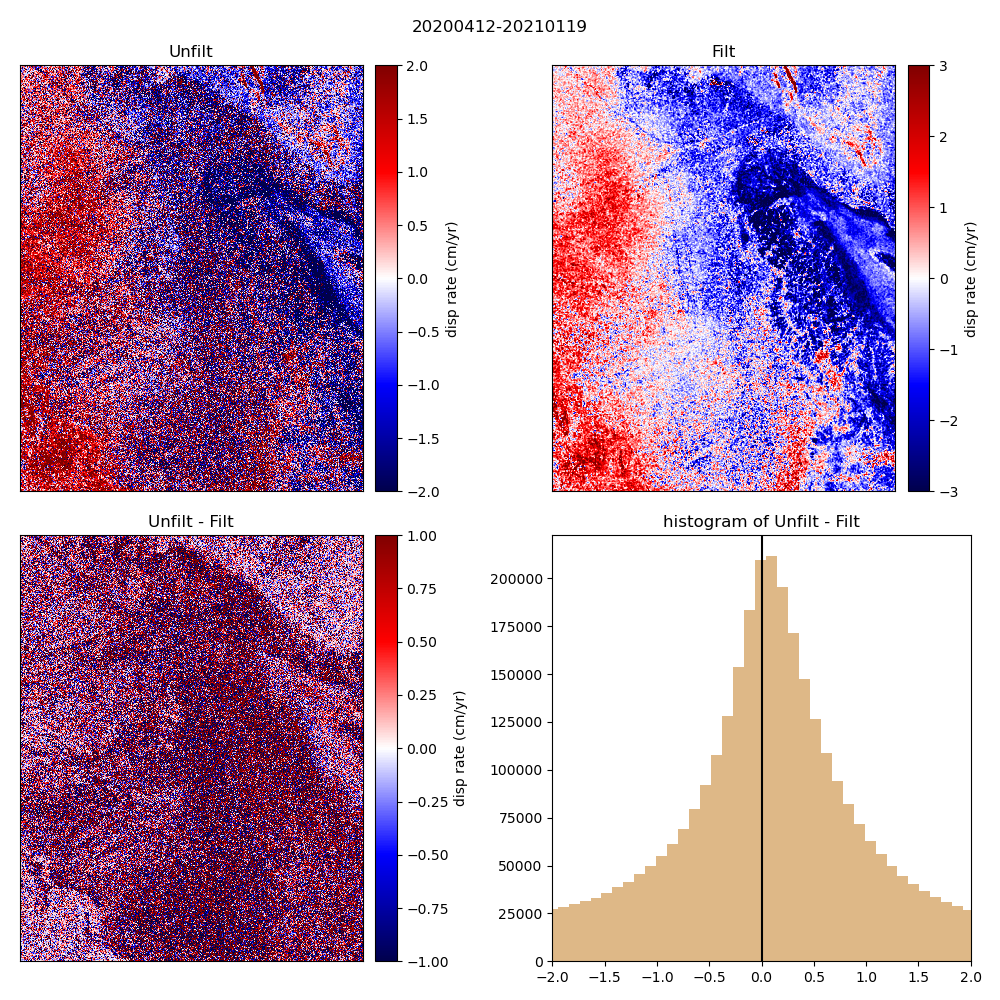

In [5]:
plt.figure(figsize=(10,10),tight_layout=True)
plt.subplot(2,2,1)
plt.imshow(disp_rates, aspect='auto', vmin=-2, vmax=2,interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('Unfilt')
plt.title(title,fontsize=12)
plt.xticks([]); plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(disp_rates_filt, aspect='auto', vmin=-3, vmax=3, interpolation='nearest') 
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('Filt')
plt.title(title,fontsize=12)
plt.xticks([]); plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(disp_rates-disp_rates_filt, aspect='auto', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('Unfilt - Filt')
plt.title(title,fontsize=12)
plt.xticks([]); plt.yticks([])

colors_to_use = ['gold','hotpink','olive','coral','cornflowerblue','gray','burlywood']
plt.subplot(2,2,4)
temp_hist = (disp_rates-disp_rates_filt).flatten()
plt.hist(temp_hist,bins=500,color=colors_to_use[i])
title='histogram of Unfilt - Filt'
plt.title(title,fontsize=12)
plt.xlim([-2,2])
Ymin,Ymax = plt.gca().get_ylim()
plt.axvline(x=0,ymin=Ymin,ymax=Ymax,color='k')

plt.suptitle(str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]]))
plt.show()

Filter the Unfilt-filt map and see if the visual pattern still exists. 

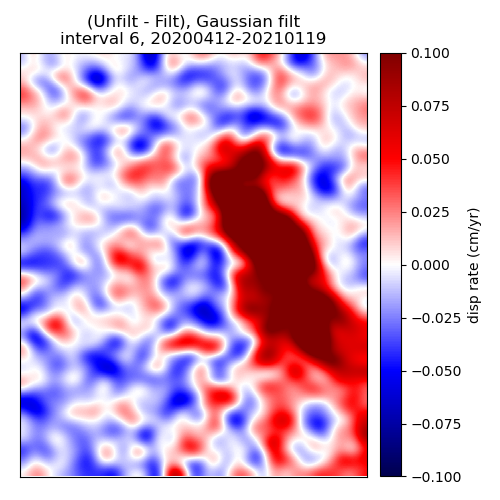

In [6]:
# filter it with width 100
alooks = 4
rlooks = 20
diff_filt = gaussian_filter(disp_rates-disp_rates_filt,sigma=[alooks*5,rlooks*5])

plt.figure(figsize=(5,5),tight_layout=True)
plt.imshow(diff_filt, aspect='auto', vmin=-0.1, vmax=0.1, interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('(Unfilt - Filt), Gaussian filt\ninterval '+str(i)+', '+str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]]))
plt.title(title,fontsize=12)
plt.xticks([]); plt.yticks([])
plt.show()

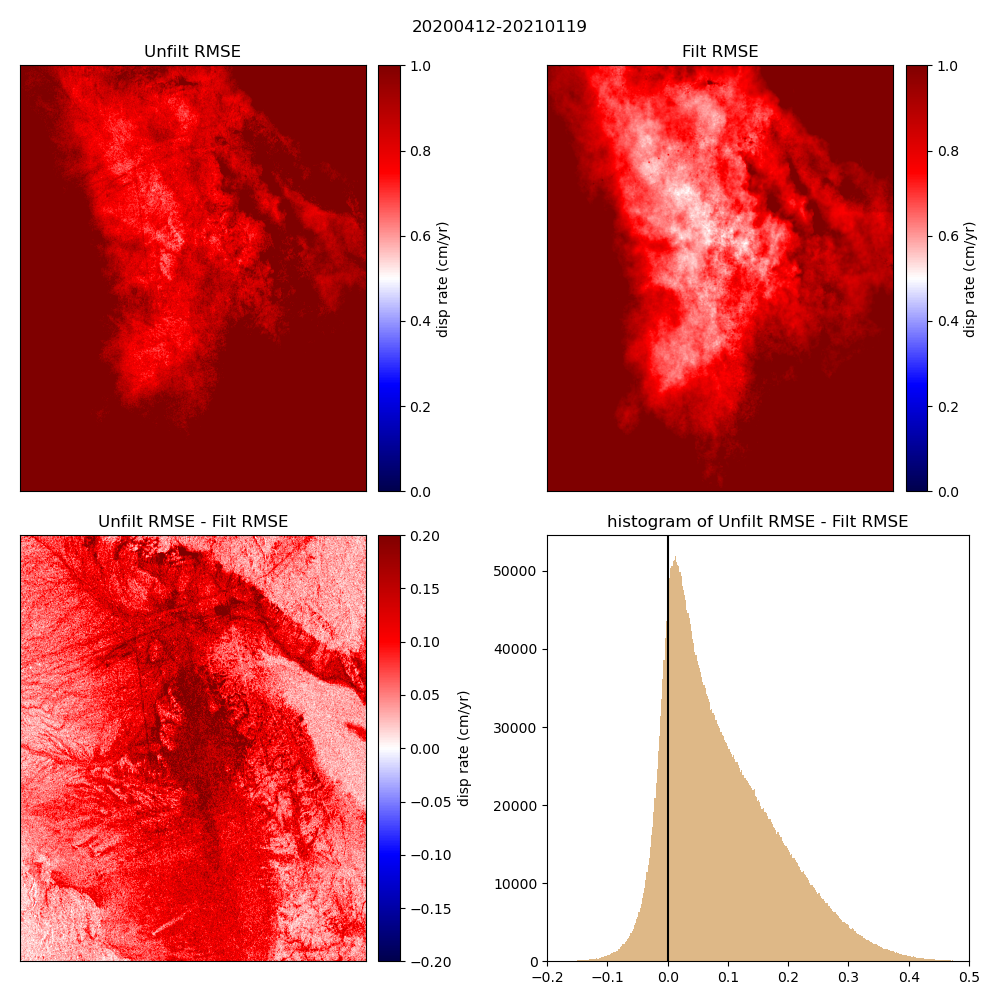

In [7]:
plt.figure(figsize=(10,10),tight_layout=True)
plt.subplot(2,2,1)
plt.imshow(disp_rates_errors, aspect='auto', vmin=0, vmax=1) # interpolation='nearest'
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('Unfilt RMSE')
plt.title(title,fontsize=12)
plt.xticks([]); plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(disp_rates_filt_errors, aspect='auto', vmin=0, vmax=1) # interpolation='nearest'
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('Filt RMSE')
plt.title(title,fontsize=12)
plt.xticks([]); plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(disp_rates_errors-disp_rates_filt_errors, aspect='auto', vmin=-0.2, vmax=0.2) # interpolation='nearest'
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('Unfilt RMSE - Filt RMSE')
plt.title(title,fontsize=12)
plt.xticks([]); plt.yticks([])

colors_to_use = ['gold','hotpink','olive','coral','cornflowerblue','gray','burlywood']
plt.subplot(2,2,4)
temp_hist = (disp_rates_errors-disp_rates_filt_errors).flatten()
plt.hist(temp_hist,bins=500,color=colors_to_use[i])
title='histogram of Unfilt RMSE - Filt RMSE'
plt.title(title,fontsize=12)
plt.xlim([-0.2,0.5])
Ymin,Ymax = plt.gca().get_ylim()
plt.axvline(x=0,ymin=Ymin,ymax=Ymax,color='k')

plt.suptitle(str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]]))
plt.show()

Plot error maps masked with RMSE threshold of 1.0 cm/yr std. 

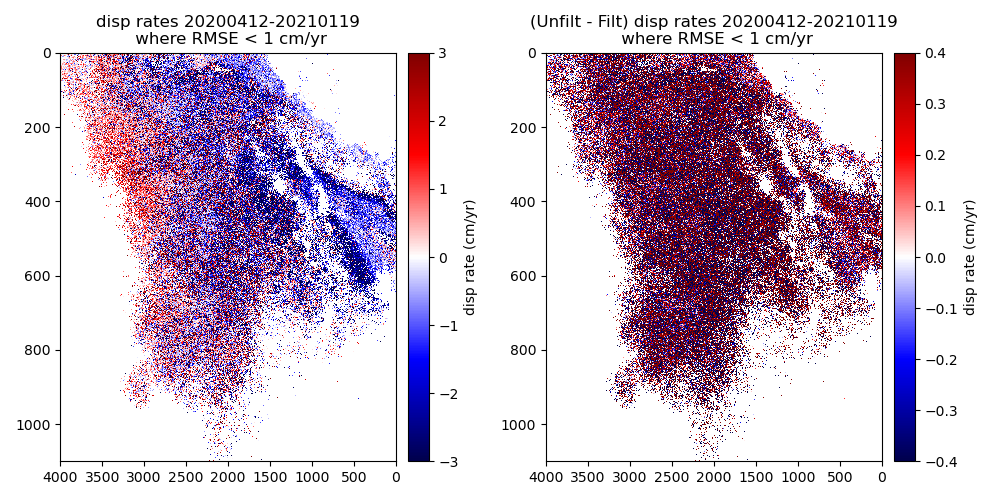

In [8]:
plt.figure(figsize=(10,5),tight_layout=True)
std_mask = np.ma.masked_where(disp_rates_errors>1.0,disp_rates)
plt.subplot(1,2,1)
plt.imshow(std_mask, aspect='auto', vmin=-3,vmax=3, interpolation='nearest', extent = [0,dx,dy,0])
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('disp rates '+str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]])+'\n where RMSE < 1 cm/yr')
plt.title(title,fontsize=12)
#plt.xticks([]); plt.yticks([])
plt.subplot(1,2,2)
diff_mask = np.ma.masked_where(disp_rates_errors>1.0,disp_rates-disp_rates_filt)
plt.imshow(diff_mask, aspect='auto', vmin=-0.4,vmax=0.4, interpolation='nearest', extent = [0,dx,dy,0])
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('(Unfilt - Filt) disp rates '+str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]])+'\n where RMSE < 1 cm/yr')
plt.title(title,fontsize=12)
plt.show()
#plt.savefig("disp_rates_period_1-2.png", transparent=True)

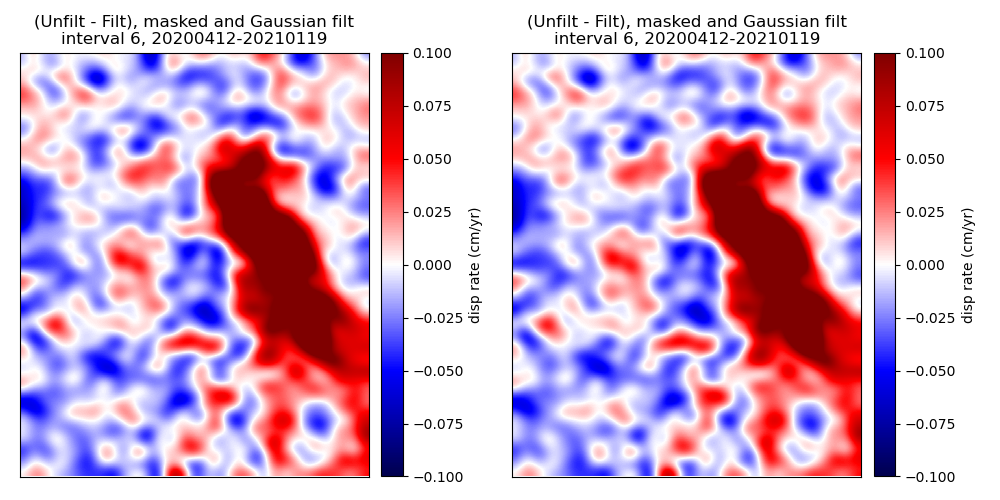

In [9]:
# filter it with width 100
alooks = 4
rlooks = 20
#diff_masked_filt = np.zeros((dy,dx))
diff_masked_filt = gaussian_filter(diff_mask,sigma=[alooks*5,rlooks*5])

plt.figure(figsize=(10,5),tight_layout=True)
plt.subplot(1,2,1)
plt.imshow(diff_masked_filt, aspect='auto', vmin=-0.1, vmax=0.1, interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('(Unfilt - Filt), masked and Gaussian filt\ninterval '+str(i)+', '+str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]]))
plt.title(title,fontsize=12)
plt.xticks([]); plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(diff_filt, aspect='auto', vmin=-0.1, vmax=0.1, interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.03,label='disp rate (cm/yr)')
plt.set_cmap('seismic')
plt.xlim([dx,0]); plt.ylim([dy,0])
title = str('(Unfilt - Filt), masked and Gaussian filt\ninterval '+str(i)+', '+str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]]))
plt.title(title,fontsize=12)
plt.xticks([]); plt.yticks([])
plt.show()

Do histograms for each surface type: LS, mountains, open desert.

In [10]:
# load LS and mtns masks. 
# maskdir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_northern_shore_LS_for_unwrapping/masks/'
maskdir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/masks/'

LS_file = 'LS_mask.r4'
ds = gdal.Open(maskdir+LS_file,gdal.GA_ReadOnly)
LS_mask = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
LS_y,LS_x = np.nonzero(LS_mask)
print('LS mask loaded.')
mtns_file = 'mtns_mask.r4'
ds = gdal.Open(maskdir+mtns_file,gdal.GA_ReadOnly)
mtns_mask = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
mtns_y,mtns_x = np.nonzero(mtns_mask)
print('mtns mask loaded.')
# Find pixels that are neither in LS or mountains (open desert).
desert_mask = np.ones(np.shape(mtns_mask))
desert_mask[LS_y,LS_x] = 0.0
desert_mask[mtns_y,mtns_x] = 0.0
desert_y,desert_x = np.nonzero(desert_mask)

LS mask loaded.
mtns mask loaded.


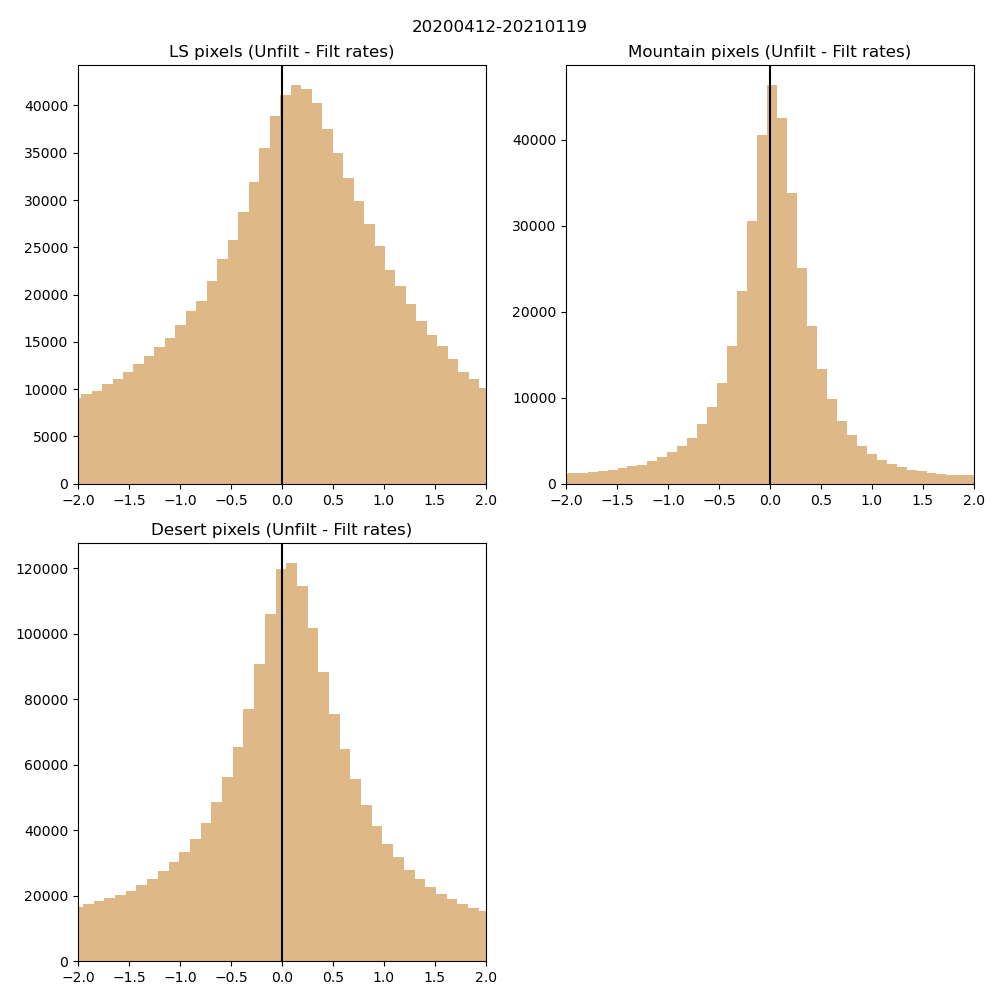

In [11]:
diffs_LS = disp_rates[LS_y,LS_x]-disp_rates_filt[LS_y,LS_x]
diffs_LS = diffs_LS.flatten()
diffs_mtns = disp_rates[mtns_y,mtns_x]-disp_rates_filt[mtns_y,mtns_x]
diffs_mtns = diffs_mtns.flatten()
diffs_desert = disp_rates[desert_y,desert_x]-disp_rates_filt[desert_y,desert_x]
diffs_desert = diffs_desert.flatten()

plt.figure(figsize=(10,10),tight_layout=True)
plt.subplot(2,2,1)
plt.hist(diffs_LS,bins=500,color=colors_to_use[i])
plt.xlim([-2,2])
Ymin,Ymax = plt.gca().get_ylim()
plt.axvline(x=0,ymin=Ymin,ymax=Ymax,color='k')
plt.title('LS pixels (Unfilt - Filt rates)')

plt.subplot(2,2,2)
plt.hist(diffs_mtns,bins=500,color=colors_to_use[i])
plt.xlim([-2,2])
Ymin,Ymax = plt.gca().get_ylim()
plt.axvline(x=0,ymin=Ymin,ymax=Ymax,color='k')
plt.title('Mountain pixels (Unfilt - Filt rates)')

plt.subplot(2,2,3)
plt.hist(diffs_desert,bins=500,color=colors_to_use[i])
plt.xlim([-2,2])
Ymin,Ymax = plt.gca().get_ylim()
plt.axvline(x=0,ymin=Ymin,ymax=Ymax,color='k')
plt.title('Desert pixels (Unfilt - Filt rates)')

title = str(str(dates[start_indices[i]])+'-'+str(dates[end_indices[i]]))
plt.suptitle(title,fontsize=12)
plt.show()
#plt.savefig("disp_rates_period_1-2.png", transparent=True)